# Install the libs

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Binarize the image

In [3]:
def binarize_image(image_path, threshold=128):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary

# Create the PAD of the image

In [4]:
def pad_image(image, kernel):
    pad_h, pad_w = kernel.shape[0] // 2, kernel.shape[1] // 2
    return np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

# Make the erosion of the image

In [5]:
def erosion(image, kernel):
    padded = pad_image(image, kernel)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.all(padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel == kernel * 255):
                result[i, j] = 255
    
    return result

# Make the dilation of the image

In [6]:
def dilation(image, kernel):
    padded = pad_image(image, kernel)
    result = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.any(padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel == 255):
                result[i, j] = 255
    
    return result

# Make the opening of the image

In [7]:
def opening(image, kernel):
    return dilation(erosion(image, kernel), kernel)

# Make the closening of the image

In [8]:
def closing(image, kernel):
    return erosion(dilation(image, kernel), kernel)

# Execute the morphologys

In [ ]:
# Take the original image and binarize
image_path = "image.png"
bin_image = binarize_image(image_path)

# Create the ES to determine the neighborhood
kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]], dtype=np.uint8)

# Aply the morphs in the image
eroded = erosion(bin_image, kernel)
dilated = dilation(bin_image, kernel)
opened = opening(bin_image, kernel)
closed = closing(bin_image, kernel)

# Show eroded image

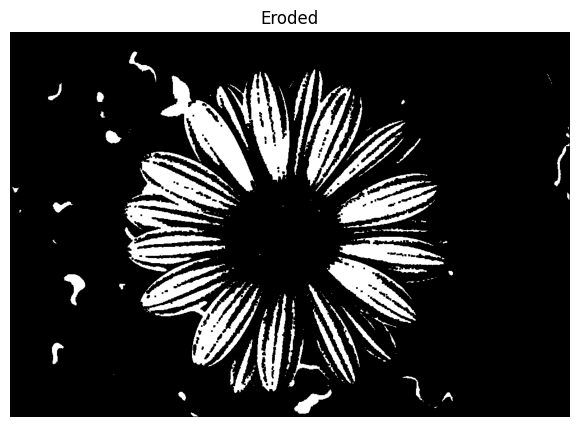

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
plt.title("Eroded")
plt.axis("off")
plt.show()

# Show dilated image

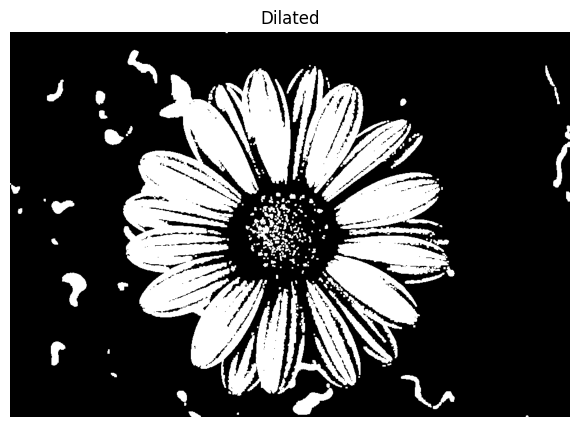

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
plt.title("Dilated")
plt.axis("off")
plt.show()

# Show opened image

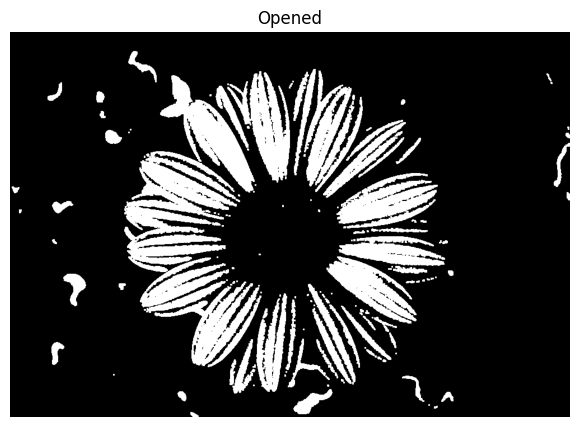

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(opened, cv2.COLOR_BGR2RGB))
plt.title("Opened")
plt.axis("off")
plt.show()

# Show closed image

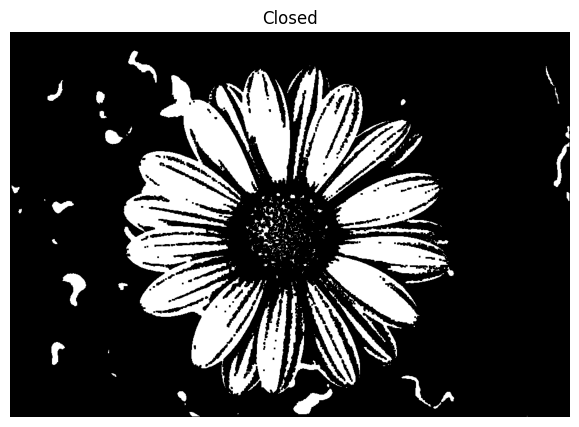

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(closed, cv2.COLOR_BGR2RGB))
plt.title("Closed")
plt.axis("off")
plt.show()